In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
x0 = 100  # Spot
T = 1
lambda_moins=6
lambda_=4
lambda_plus=3
delta_m=0.2
N=2**11
delta=1
L=delta*(N-1)
sigma=0.2
c=0.2
p=0.5
r=0.02
k=100
k0=np.log(0.6*x0)-np.log(x0)

## KOU

In [3]:
def Phi_BS(sigma1,T,v):
    return np.exp(-sigma1**2 *T/2 *(v**2 +1j*v))


def Phi_kou(u,r,sigma,T,p,lambda_,lambda_plus,lambda_moins):
    b = -(sigma**2)/2- lambda_*(p*(lambda_plus/(lambda_plus - 1)) + (1-p)*lambda_moins/(lambda_moins+1) -1 )
    return(np.exp(T*(-sigma**2 /2 + 1j*b*u+ 1j*u*lambda_*(p/(lambda_plus - 1j*u) -(1-p) /(lambda_moins+1j*u)))))



def ksi_kou(u,r,sigma,T,p,lambda_,lambda_plus,lambda_moins):  
    return(np.exp(1j*u*r*T)*(Phi_kou(u-1j,r,sigma,T,p,lambda_,lambda_plus,lambda_moins)-Phi_BS(0.2,T,u-1j) )/(1j*u*(1+1j*u)))

In [4]:
def R_n_kou(N,L,k,x0,r,sigma,T,p,lambda_,lambda_plus,lambda_moins,delta):
    resu=[]
    k_tilde=k#-np.log(x0)
    for m in range(N):
        km=k_tilde+2*np.pi*m/(N*delta)
        wm = 2/3 if m % 2 == 0 else 4/3
        if m==0:
            wm=1/3
        #exp1=np.exp(-1j*k_tilde*((-L/2)+m*delta))
        vm=-L/2+m*delta
        resu.append(wm*ksi_kou(vm,r,sigma,T,p,lambda_,lambda_plus,lambda_moins)*np.exp(-1j*k*delta*m))
    return resu#*L/(2*np.pi*(N-1))*np.exp(1j*k*L/2)


def european_call(K,T,sig,r,S_t,t=0):
    d1=(1/(sig*np.sqrt(T-t)))*(np.log(S_t/K)+(r+((sig**2)/2))*(T-t))
    d2=d1-sig*np.sqrt(T-t)
    C=S_t*(norm.cdf(d1))-K*np.exp(-r*(T-t))*norm.cdf(d2)
    return C 

def pricing_fourrier(R_n,delta,X0,r,T,k,N,L):
    prices=[]
    for i in range(N):
        call_bs=european_call(np.exp(k0+ 2*np.pi*(i/(N*delta))),1,0.2,r,1)
        #print(call_bs)
        #print( (np.pi * i / (N * delta) )* L/2)
        #print((k0 + 2 * np.pi * i / (N * delta) )* L/2)
        prices.append(x0*(call_bs+R_n[i]*(L/(2*np.pi*(N-1)))*np.exp(1j*(k0 +( 2 * np.pi * i / (N * delta) )* L/2))))
    return prices

c:\users\msi\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


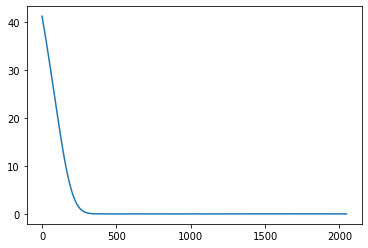

In [5]:
Kou=(R_n_kou(N,L,k,x0,r,c,T,p,lambda_,lambda_plus,lambda_moins,delta))
Kou=np.fft.ifft(Kou)
plt.plot(pricing_fourrier(Kou,delta,x0,r,T,np.log(0.6),N,L))
plt.show()

## merton

In [6]:
def Phi_BS(sigma1,T,v):
    return np.exp(-sigma1**2 *T/2 *(v**2 +1j*v))


def Phi_merton(u,r,sigma,T,p,lambda_,delta_m):
    b = - c/2 + lambda_ * (1 - np.exp((delta_m**2)/2))
    return(np.exp(T*(-sigma**2 /2 + 1j*b*u+ lambda_*np.exp(-delta_m**2 *u**2 /2 )-1)))



def ksi_m(u,r,sigma,T,p,delta_m,lambda_):  
    return(np.exp(1j*u*r*T)*(Phi_merton(u-1j,r,sigma,T,p,lambda_,delta_m)-Phi_BS(0.2,T,u-1j) )/(1j*u*(1+1j*u)))

In [7]:
def R_n_merton(N,L,k,x0,r,sigma,T,p,lambda_,delta_m,delta):
    resu=[]
    #k_tilde=k#-np.log(x0)
    for m in range(N):
        #km=k_tilde+2*np.pi*m/(N*delta)
        km=k+2*np.pi*m/(N*delta)
        wm = 2/3 if m % 2 == 0 else 4/3
        if m==0:
            wm=1/3
        #exp1=np.exp(-1j*k_tilde*((-L/2)+m*delta))
        vm=-L/2+m*delta
        resu.append(wm*ksi_m(vm,r,sigma,T,p,lambda_,delta_m)*np.exp(-1j*m*k))
    #return np.sum(resu)#*L/(2*np.pi*(N-1))#*np.exp(1j*k*L/2)
    return resu
def pricing_fourrier(R_n,delta,X0,r,T,k0,N,L):
    prices=[]
    for i in range(N):
        call_bs=european_call(np.exp(k0+ 2*np.pi*(i/(N*delta))),1,0.2,r,1)
        #print(call_bs)
        #print( (np.pi * i / (N * delta) )* L/2)
        #print((k0 + 2 * np.pi * i / (N * delta) )* L/2)
        prices.append(x0*(call_bs+R_n[i]*(L/(2*np.pi*(N-1)))*np.exp(1j*(k0 +( 2 * np.pi * i / (N * delta) )* L/2))))
    return prices


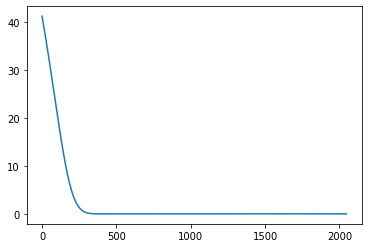

In [8]:
Merton=(R_n_merton(N,L,k0,x0,r,sigma,T,p,lambda_,delta_m,delta))
Merton=np.fft.ifft(Merton)
plt.plot(pricing_fourrier(Merton,delta,x0,r,T,np.log(0.6),N,L))
plt.show()

In [9]:
t=pricing_fourrier(Merton,delta,x0,r,T,np.log(0.6),N,L)